# Normal Distribution

### Task: Create a notebook about the normal distribution. Define and explain the main concepts. Pitch the notebook at your classmates. Use visuals like plots to explain concepts.

In [23]:
# importing all of the libraries we will need at the top of the notebook

import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

The normal distribution, also known as the Gaussian distribution, is a continuous, symmetrical probability distribution that visually resembles, and is popularly known as, the bell curve. The [Encyclopædia Britannica](https://www.britannica.com/topic/normal-distribution) (1998) notes that:

>Its familiar bell-shaped curve is ubiquitous in statistical reports, from survey analysis and quality control to resource allocation.

[Weisstein](https://mathworld.wolfram.com/NormalDistribution.html) (2020) expands on this:

>Many common attributes such as test scores, height, etc., follow roughly normal distributions, with few members at the high and low ends and many in the middle.

Another popular example of normally-distributed data is that of IQ scores, and indeed, this advert came up while I was researching at [Statistics by Jim](https://statisticsbyjim.com/basics/normal-distribution/):

![image](norm-dist-ad.png)

A quick plot in NumPy will display the typical shape:

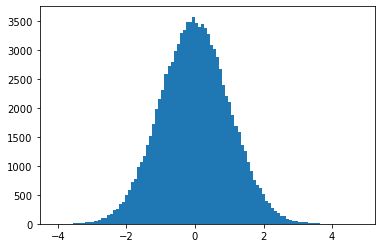

In [3]:
# a dataset of 100,000 points distributed normally. 'Loc' defines the middle point and peak of the curve,
# 'scale' how quickly that curve tapers off, and 'size' the number of data points used
nor = np.random.normal(loc=0, scale=1, size=100000)

# plot the dataset, segmenting all data points into 100 bins
plt.hist(nor, bins=100)
plt.show();

The exact characteristics of this curve are determined by two parameters: 

 - the <i>mean</i> of the range under investigation (signified by the Greek $\mu$, or <i>mu</i>, symbol). In NumPy this is known as the `loc` parameter;
 - the <i>standard variation</i> of the same dataset (signified by the Greek $\sigma$, or <i>sigma</i>, symbol). In NumPy, this is know nas the `scale` parameter.
 
The [Encyclopædia Britannica](https://www.britannica.com/topic/normal-distribution) (1998) elaborates on these concepts:

>the mean, or average, which is the maximum of the graph and about which the graph is always symmetric; and the standard deviation, which determines the amount of dispersion away from the mean.

In the below image from [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#Standard_deviation_and_coverage), we can see that 68.2% of the results fall within two standard deviations of the mean, and 99.7% falls within three standard deviations. This is true of all normally-distributed data, and is known as the Empirical Rule ([Chen](https://www.investopedia.com/terms/n/normaldistribution.asp), 2022). Beyond this point, values do not become impossible, but they do become very unlikely to occur.

![image](std-dev.png)


## Building a normal distribution plot in NumPy

Now we know a bit more about these parameters, below is a more detailed visual representation of this, where we can see how each curve peaks at the $\mu$ value, and gets flatter given a larger $\sigma$ value. The plot contains four different lines representing normally-distributed data, with differing values for the mean ($\mu$) and the standard variation ($\sigma$).

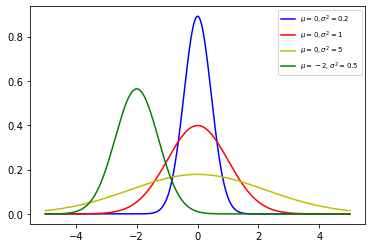

In [4]:
# I've adapted Ian's original plot code here and supplemented it with some ideas from the metadata supplied with the
# image and code found at this link: https://commons.wikimedia.org/wiki/File:Normal_Distribution_PDF.svg#Summary
# There are probably better ways to structure this code, but it is important that I find my own solution to things
# rather than simply copying-and-pasting things wholesale.

# values for the plot's x-axis
x = np.linspace(-5.0, 5.0, 1000)

# A list containing each mean, standard deviation and plot colour I wish to use,
# the NumPy sqrt() function is referred to in the bugs section of the README
mu_sig = [[0,0.2,'b'],[0,1,'r'],[0,5,'y'],[-2,0.5,'g']]

# Plot the function each of the items in mu_sig
for i in mu_sig:
    # assigns each item in the above list to a variable for use in the density function
    mu = i[0]
    # sig saves the value as-is, while sigma takes the square root
    sig = i[1]
    sigma = np.sqrt(sig)
    colour = i[2]
    # plots points on the y-axis using the density function. The divide by 1
    # in the formula below is referred to in the bugs section of the README
    plt.plot(
        x,
        # this density calculation is taken directly from the Wikipedia entry
        1/(sigma * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sigma**2)), 
        color=colour, 
        label=f'$\mu = {mu},\sigma^2 = {sig}$')

# Add a legend.
plt.legend(loc='best', fontsize='x-small')
plt.show();

We can see the effect that changing either or both of the $\mu$ and $\sigma$ values has on the shape of the plot. So the normal distribution assigns values equally either side of the mean, so the curve itself always remains symmetrical, and consistently peaks at the mean. This ensures that the "mean, median, and mode are all equal. Half of the population is less than the mean and half is greater than the mean." ([Frost](https://statisticsbyjim.com/basics/normal-distribution/), 2018).

While the symmetry of the normal distribution is one of it's most striking features, [Frost](https://statisticsbyjim.com/basics/normal-distribution/) (ibid) notes that, "not all symmetrical distributions are normal. For example, the Student’s t, Cauchy, and logistic distributions are symmetric."
    
Below we see summary plots from each of the Wikipedia articles for these distributions. In all four, the symmetry is present, but with subtle changes that ensure slight differences with the normal distribution. These are due to differing density functions, and the exact parameters that these density functions require.
    
![image](cls-dist.png)

Indeed, we can create plots using all of these distribution methods just as easily as we created the normal distribution data, using just a couple of parameters, and observe how similar they are without closer inspection.

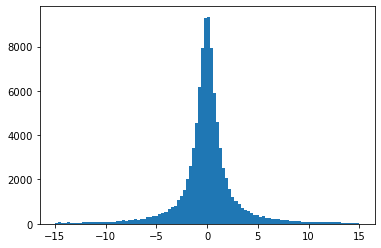

In [7]:
# a dataset distributed using Cauchy distribution, with no addition parameters required beyond size
cau = np.random.standard_cauchy(size=100000)

# step taken from the NumPy documentation on Cauchy, link in README. This limits the range to one where the curve
# is at least visible
cau = cau[(cau>-15) & (cau<15)]

# plot the dataset, segmenting all data points into 100 bins
plt.hist(cau, bins=100)
plt.show();

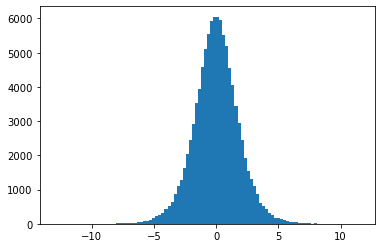

In [5]:
# a dataset distributed logistically. Like the normal distribution, it takes the mean and standard deviation as
# parameters, but the density function produces a slightly different shape
log = np.random.logistic(loc=0, scale=1, size=100000)

# plot the dataset, segmenting all data points into 100 bins
plt.hist(log, bins=100)
plt.show();

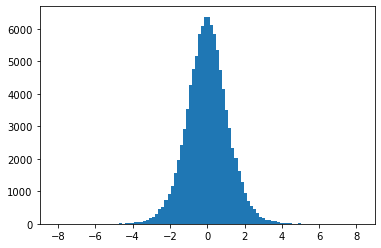

In [6]:
# parameter guide found in the GeeksForGeeks article in the README

# a dataset distributed using Student's t-distribution. Requires two parameters: degrees of freedom and range
stt = np.random.standard_t(df=10, size=100000)

# plot the dataset, segmenting all data points into 100 bins
plt.hist(stt, bins=100)
plt.show();

## The normal density function

NumPy gives us the handy `normal` function that we've already seen, where we provide the parameters and get a nice plot back. But there is work going underneath that is important to understand too. All distributions are created by a corresponding probability density function, with the normal function expressed as:

$$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Here we can see the $\mu$ and $\sigma$ symbols identified above as the mean and the standard deviation of the dataset respectively. Also of interest is the presence of $e$ and $\pi$, two mathematical constants with many uses. The full values of these items to fifty places are:

$e$ = 2.71828182845904523536028747135266249775724709369995 ([NumPy](https://numpy.org/doc/stable/reference/constants.html#numpy.e), 2022) \
$\pi$ = 3.14159265358979323846264338327950288419716939937510 ([Andersson](http://www.eveandersson.com/pi/digits/), 2022) 

Luckily, NumPy once again has a number of [constant functions](https://numpy.org/doc/stable/reference/constants.html) that we can use to quickly reference these with a high-level of accuracy, and we can also use the `exp` function to produce the exponent of a given value using $e$:

In [7]:
print(np.exp(1))
print(np.pi)

2.718281828459045
3.141592653589793


With the value of $x$ being simply a given point on the x-axis, we have everything we need to calculate and plot a normal distribution. We can use NumPy's `sqrt` functions, as well as the `pi` and `exp` to help us construct the density function.

In [8]:
mu = 0.0
sigma = 4.0
x = 1.0

# this density calculation is taken from Ian's notebook
(1.0 / np.sqrt(2 * np.pi * sigma**2)) * (np.exp(-((x - mu)**2 / (2 * sigma**2))))

0.09666702920071231

This looks rather meaningless with just a single value, so we can plot multiple values to create an x-axis. We will use the `linspace` function to create an evenly-spaced number of intervals between two points.

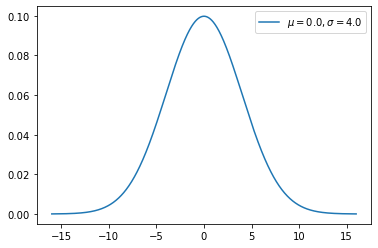

In [9]:
# plot a basic norm dist adapting Ian's code

# x-axis values for the plot
x = np.linspace(start=-16.0, stop=16.0, num=1000)

plt.plot(
    x,
    # this density calculation is taken from Ian's notebook
    (1.0 / np.sqrt(2 * np.pi * sigma**2)) * (np.exp(-((x - mu)**2 / (2 * sigma**2)))),
    # this density calculation is taken from Wikipedia
    # (1/(sigma * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sigma**2))),
    label=f'$\mu = {mu}, \sigma = {sigma}$')

# Add a legend.
plt.legend();

## The Central Limit Theorem

Until now, we've been using large populations to demonstrate the normal distribution, but using a smaller dataset will help demonstrate a key feature of the normal distribution, and why it is so ubiquitous in the field of statistics and beyond.

I had previously picked 100,000 as a population size because it is sufficiently large for the curve to be relatively unaffected by anomalies. In all of the examples so far, the shape of the curve is broadly symmetrical, even if it is not exactly symmetrical. Below is the same code that was used at the very start of this notebook.

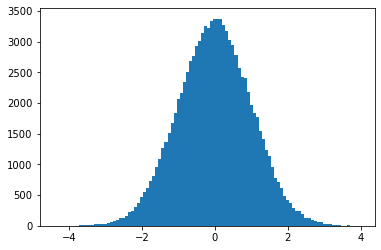

In [19]:
nor = np.random.normal(loc=0, scale=1, size=100000)
plt.hist(nor, bins=100)
plt.show();

If we run the same code, but for a smaller number of data points, we can see that the anomalies of randomised data begin to appear more prominent, because in a smaller dataset, even a single outlier can have a much larger effect on a population. A population of 100, segmented into bins of 50 as displayed below, barely looks like a normal distribution at all, and we can see how powerful the outliers become. 

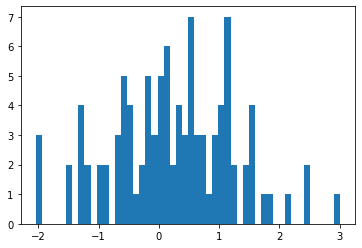

In [16]:
nor = np.random.normal(loc=0, scale=1, size=100)
plt.hist(nor, bins=50)
plt.show();

If we adjust the code for a population size of 1,000 in 100 bins, things start looking more familiar. We can still see that there's significant variations between individual bins that gives a 'spiky' look, but the familiar curve is visible.

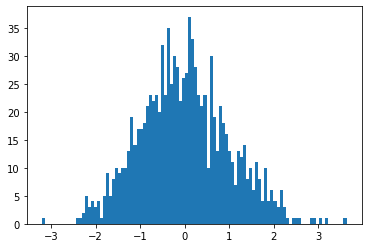

In [13]:
nor = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(nor, bins=100)
plt.show();

Once we get to a population size of 10,000, most of the 'spikes' previously observed have been smoothed out, and the outliers are now playing a much less significant role, those outliers are now falling outside of the 95% or two standard deviations that the Empirical Rule outlines earlier in the notebook.

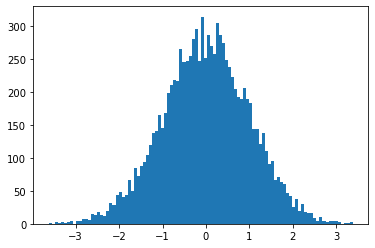

In [20]:
nor = np.random.normal(loc=0, scale=1, size=10000)
plt.hist(nor, bins=100)
plt.show();

In isolation, this behaviour is to be expected. After all, we are asking the `normal` function to return data that is normally-distributed; proving that normally-distributed data is normally-distributed is a tautology. The real power of this comes in the sampling of data, and not necessarily even sampling normally-distributed data.

A core tenet of the central limit theorem ([NIST ESH](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm), 2003) holds that:

>The sampling distribution of the mean becomes approximately normal regardless of the distribution of the original variable.

This makes the normal distribution extremely useful for testing the accuracy of sampled data, because rather than testing hundreds, thousands or even millions of sample datasets, you can plot their means together and expect those to be normally-distributed.

Following a YouTube video on the Central Limit Theorem ([Starmer](https://www.youtube.com/watch?v=YAlJCEDH2uY), 2018), we can demonstrate this quite quickly using the familiar tools.

In the example, Starmer shows 20 uniformly-distributed datasets, then plots the means of each on a histogram.

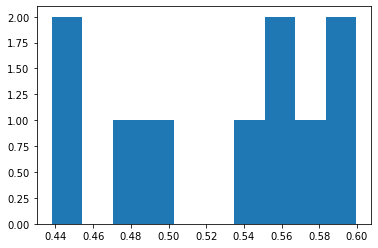

In [49]:
# create a blank list to store mean values in
unis = []
# perform this action 10,000 times
for i in range(10):
    # create a dataset of ten uniformly-distributed items, all between 0 and 1 in value.
    rng = np.random.uniform(0,1,20)
    # calculate the mean of the range, and then add it the list
    unis.append(np.mean(rng))

plt.hist(unis)
plt.show();

At present this doesn't really tell us much. The values will mostly be between 0.4 and 0.6, which is where we would expect the mean to be, but the dataset is too small to prove the theorem. If we increase the size of the range that is looped through, we start to see a recognisable curve.

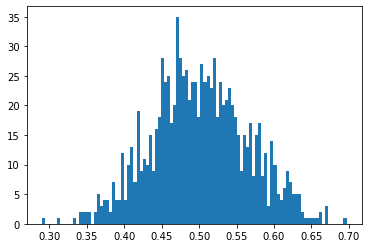

In [52]:
unis = []
for i in range(1000):
    rng = np.random.uniform(0,1,20)
    unis.append(np.mean(rng))

plt.hist(unis, bins=100)
plt.show();

By the time we get to 100,000, the curve is undeniable. Despite the source data being uniformly-distributed, we see a strong normal distribution curve when plotting the means of these uniform datasets, thus proving that:

>... the mean of any set of variates with any distribution having a finite mean and variance tends to the normal distribution. ([Weisstein](https://mathworld.wolfram.com/NormalDistribution.html), 2020)

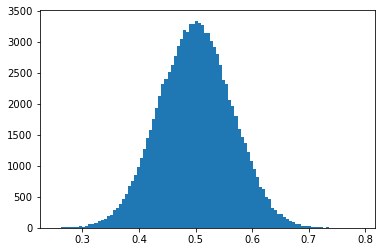

In [76]:
unis = []
for i in range(100000):
    rng = np.random.uniform(0,1,20)
    unis.append(np.mean(rng))

plt.hist(unis, bins=100)
plt.show();

## Probability and Z-Scores

One of the defining features of the normal distribution is the ease with which the probability of a value occurring somewhere along the curve can be calculated using the plot. This is achieved by first converting the distribution to a Standard Normal Distribution, whereby $\mu=0$ and $\sigma^2=1$ ([Bhandari](https://www.scribbr.com/statistics/normal-distribution/), 2020), and the mathematical function for doing so is laid out by ([Weisstein](https://mathworld.wolfram.com/NormalDistribution.html), 2020): 

>An arbitrary normal distribution can be converted to a standard normal distribution by changing variables to $z = \frac{x - \mu}{\sigma}$

This is known as the <i>z-score</i> and can be demonstrated by adapting the code we used in the previous exercise, following along with the process identified [here](https://www.youtube.com/watch?v=xI9ZHGOSaCg) and which is helpfully summarised in this screenshot below:

<img src="standardised.png" style="width: 400px;"/>

The mean of this standardised population is 1.5353052162936364e-15


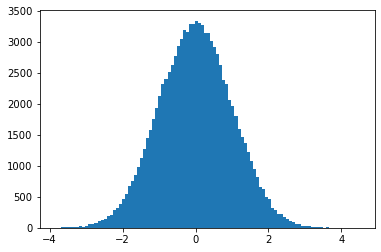

In [79]:
# create a second blank list for storing the z-values
snd = []
# identify the mean of the range created above
mu = np.mean(unis)
# identify standard deviation of the same range
sigma = np.std(unis)

# loop through values and apply the standardising process to each value, then add the result to the new list
for z in unis:
    stdised = (z - mu) / sigma
    snd.append(stdised)

# print the mean to ensure it is very close to zero, e.g. -1.2714362895849263e-15 
print(f'The mean of this standardised population is {np.mean(snd)}')

# plot the results
plt.hist(snd, bins=100)
plt.show();

The result above is a dataset that been transferred from a mean of 0.5, to that with a mean of 0 and a standard deviation of 1. Indeed if you compare both plots, they will have exactly the same shape.

With standardised data, we can now harness in-built functions in [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to get probability and percentile data for given values.

In [84]:
# identify the value we wish to locate from the original data
mean = 0.55

# standardise that value using the mean and standard deviations identified earlier
std_mean = (mean - mu) / sigma

# this is taken from Ian's notebook
ss.norm().cdf(std_mean)

0.782137853064323

Thus, in the mean values of uniformly-distributed data that we have been working through, made up of 100,000 20-item datasets between 0 and 1, we know that 0.55 sits at the 78th percentile of those mean values.